# EPNet data analysis 

In [2]:
# Notebook prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
from plotly.graph_objs import *
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

/Users/iar1g09/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import plotly
plotly.tools.set_credentials_file(username='izoken@gmail.com', api_key='846eKsoMLxYnGL0VlnIL')

In [4]:
# read data
df = pd.read_excel('StraussShipwrecks.xlsx') 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

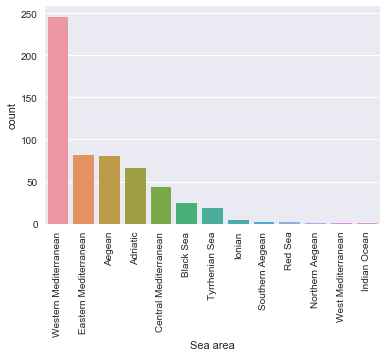

In [4]:
sns.countplot(x = 'Sea area', order = df['Sea area'].value_counts().index, data = df)
plt.xticks (rotation = 90)

In [5]:
# remove shipwrecks withot coordinates
df_map = df[df.Latitude != 0]

In [6]:
site_lat = df_map.Latitude
site_lon = df_map.Longitude
locations_name = df.Name

In [7]:
mapbox_access_token = "pk.eyJ1IjoiaXphcm9tYW5vd3NrYSIsImEiOiJjamRuNTdodTMwYWdmMnhtazduNWJwYngxIn0.mqQY0gpKdO3M8ciTuRioQg"
data = Data([
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    )]
)
        
layout = Layout(
    title='Roman Shipwrecks',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=10
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Roman Shipwrecks')

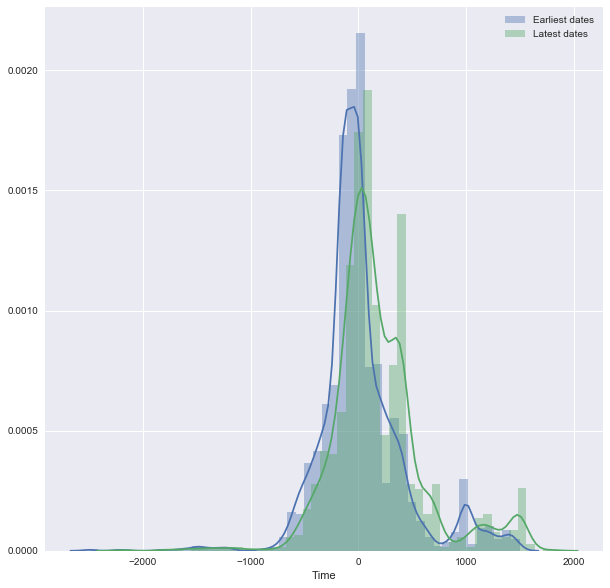

In [9]:
plt.figure(figsize = (10,10))
sns.distplot(df['Earliest date'].dropna(), label = 'Earliest dates')
sns.distplot(df['Latest date'].dropna(), label = 'Latest dates')
plt.legend()
plt.xlabel('Time')


In [12]:
from data_prob2 import *

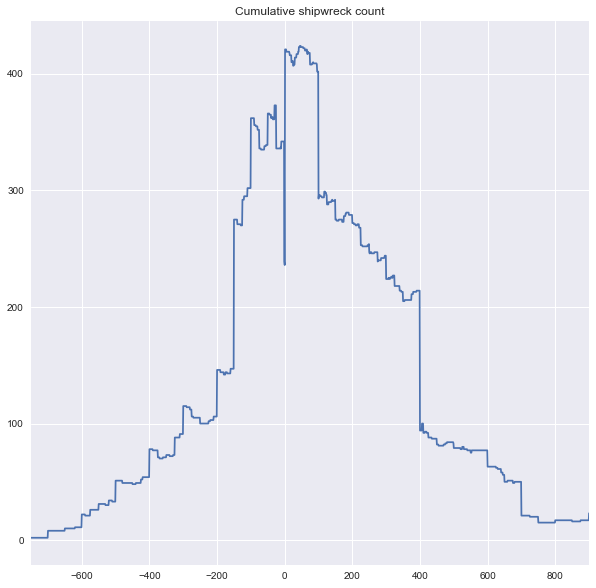

In [13]:
fig = plt.figure(figsize=(10, 10))
s = calc_prob(df,'Earliest date', 'Latest date')
plt.plot(s)
plt.xlim(-750, 900)
plt.title('Cumulative shipwreck count')

In [39]:
df['Sea area'].unique()

array(['Adriatic', 'Western Mediterranean', 'Tyrrhenian Sea',
       'Central Mediterranean', 'Aegean', 'Eastern Mediterranean',
       'Black Sea', 'Red Sea', 'Indian Ocean', nan, 'Ionian',
       'West Mediterranean', 'Southern Aegean', 'Northern Aegean'], dtype=object)

In [11]:
df['Place of destination'] = df['Place of destination'].map(lambda x: x.lstrip('?').rstrip('?'), na_action = 'ignore')
df['Place of origin'] = df['Place of origin'].map(lambda x: x.lstrip('?').rstrip('?'), na_action = 'ignore')
flows = df[['Place of origin','Place of destination']].dropna(how = 'any')
flows = flows[flows['Place of origin'] != '']
flows = flows[flows['Place of destination'] != '']
flows.to_csv('flow.csv', index_label = 'id')

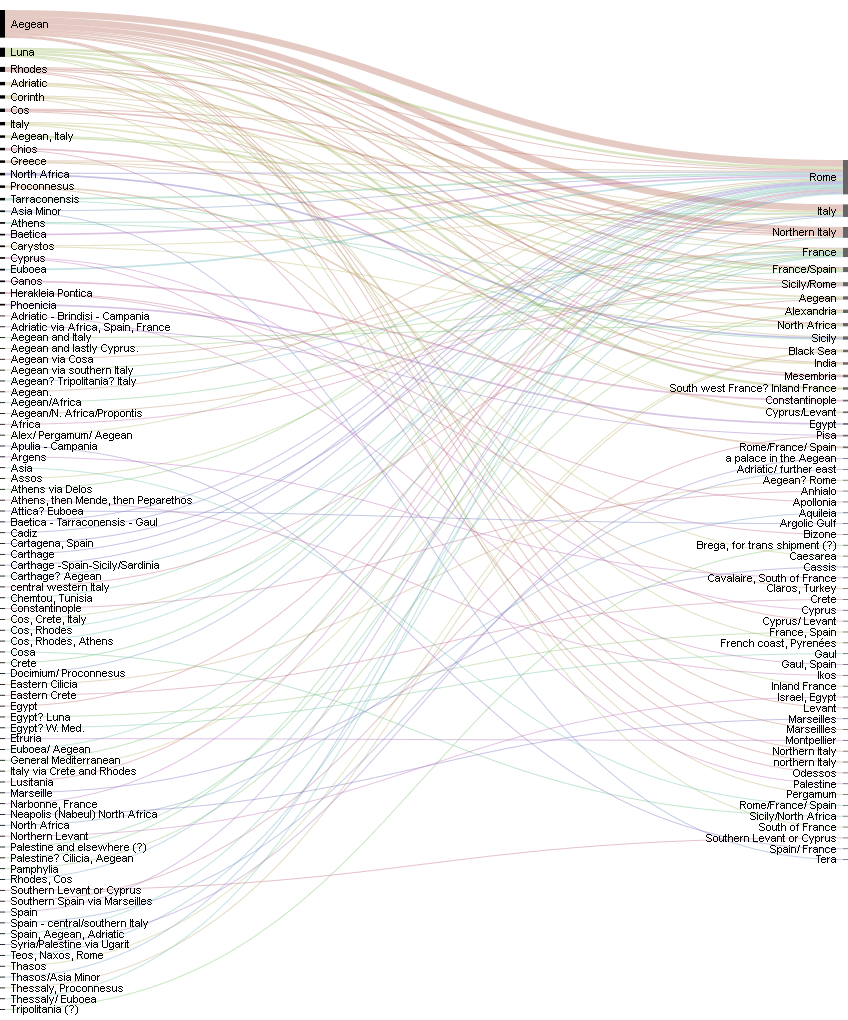

In [44]:
from IPython.display import Image
Image('flows.png')

In [42]:
xls = pd.ExcelFile('MapasIzaResumen.xls')
provs = xls.parse(xls.sheet_names[0])
provs2 = pd.read_excel('MapasIzaResumen.xls', header = None, index_col = 0, names = ['dest'])
#print(provs2.index)
prov_mapping = provs2.to_dict()
prov_mapping = prov_mapping['dest']
flows = df[['Place of origin','Place of destination']].dropna(how = 'any')
flows = flows[flows['Place of origin'] != '']
flows = flows[flows['Place of destination'] != '']
flows['origin_cat']= flows['Place of origin'].map(prov_mapping)
flows['destin_cat']= flows['Place of destination'].map(prov_mapping)
flows = flows.dropna(how = 'any')
#print(df['Place of origin'], prov_mapping)
flows[['origin_cat','destin_cat']].to_csv('flows_cat.csv', index_label = 'id')


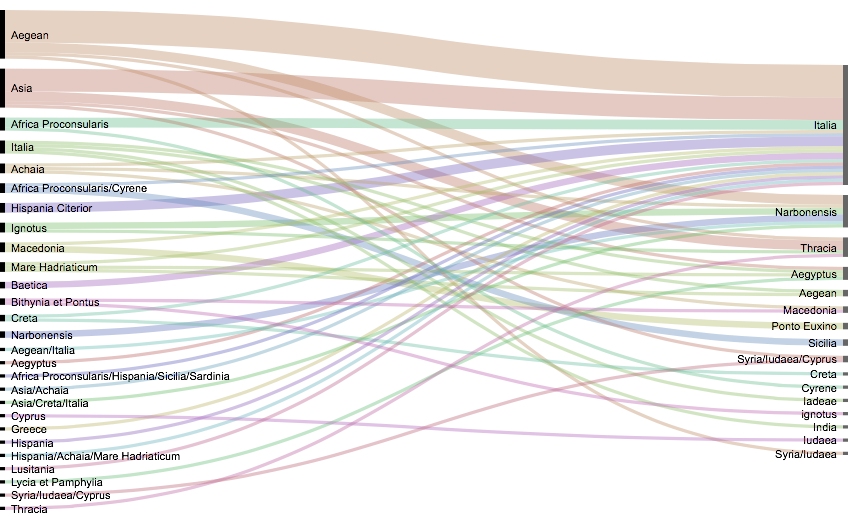

In [46]:
Image('flows_cat.png')

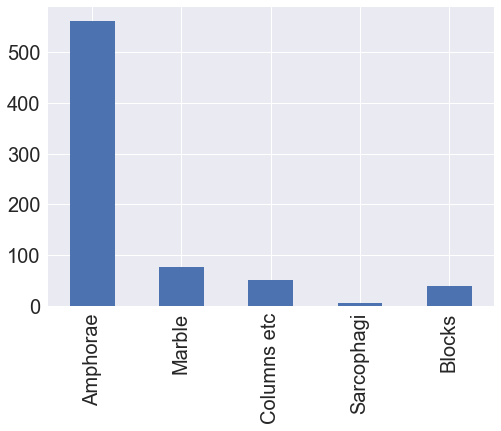

In [37]:
'''plt.figure (figsize = (15, 15))
count = 1
for i in ['Amphorae', 'Marble', 'Columns etc', 'Sarcophagi', 'Blocks',]:
    plt.subplot( 3, 2, count)
    sns.countplot(x = i, data = df)
    count+=1
    plt.xticks(rotation = 90)
plt.tight_layout()'''
cargo = ['Amphorae', 'Marble', 'Columns etc', 'Sarcophagi', 'Blocks']

plot_data = df[cargo]
counts = plot_data.apply(pd.value_counts)
counts.iloc[1].plot(kind = 'bar')

In [46]:
df.columns

Index(['Wreck ID', 'Strauss ID', 'Name', 'Parker Number', 'Sea area',
       'Country', 'Region', 'Latitude', 'Longitude', 'Min depth', 'Max depth',
       'Depth', 'Period', 'Dating', 'Earliest date', 'Latest date',
       'Date range', 'Mid point of date range', 'Probability',
       'Place of origin', 'Place of destination', 'Reference', 'Comments',
       'Amphorae', 'Marble', 'Columns etc', 'Sarcophagi', 'Blocks',
       'Marble type', 'Other cargo', 'Hull remains', 'Shipboard paraphernalia',
       'Ship equipment', 'Estimated tonnage', 'Amphora type'],
      dtype='object')

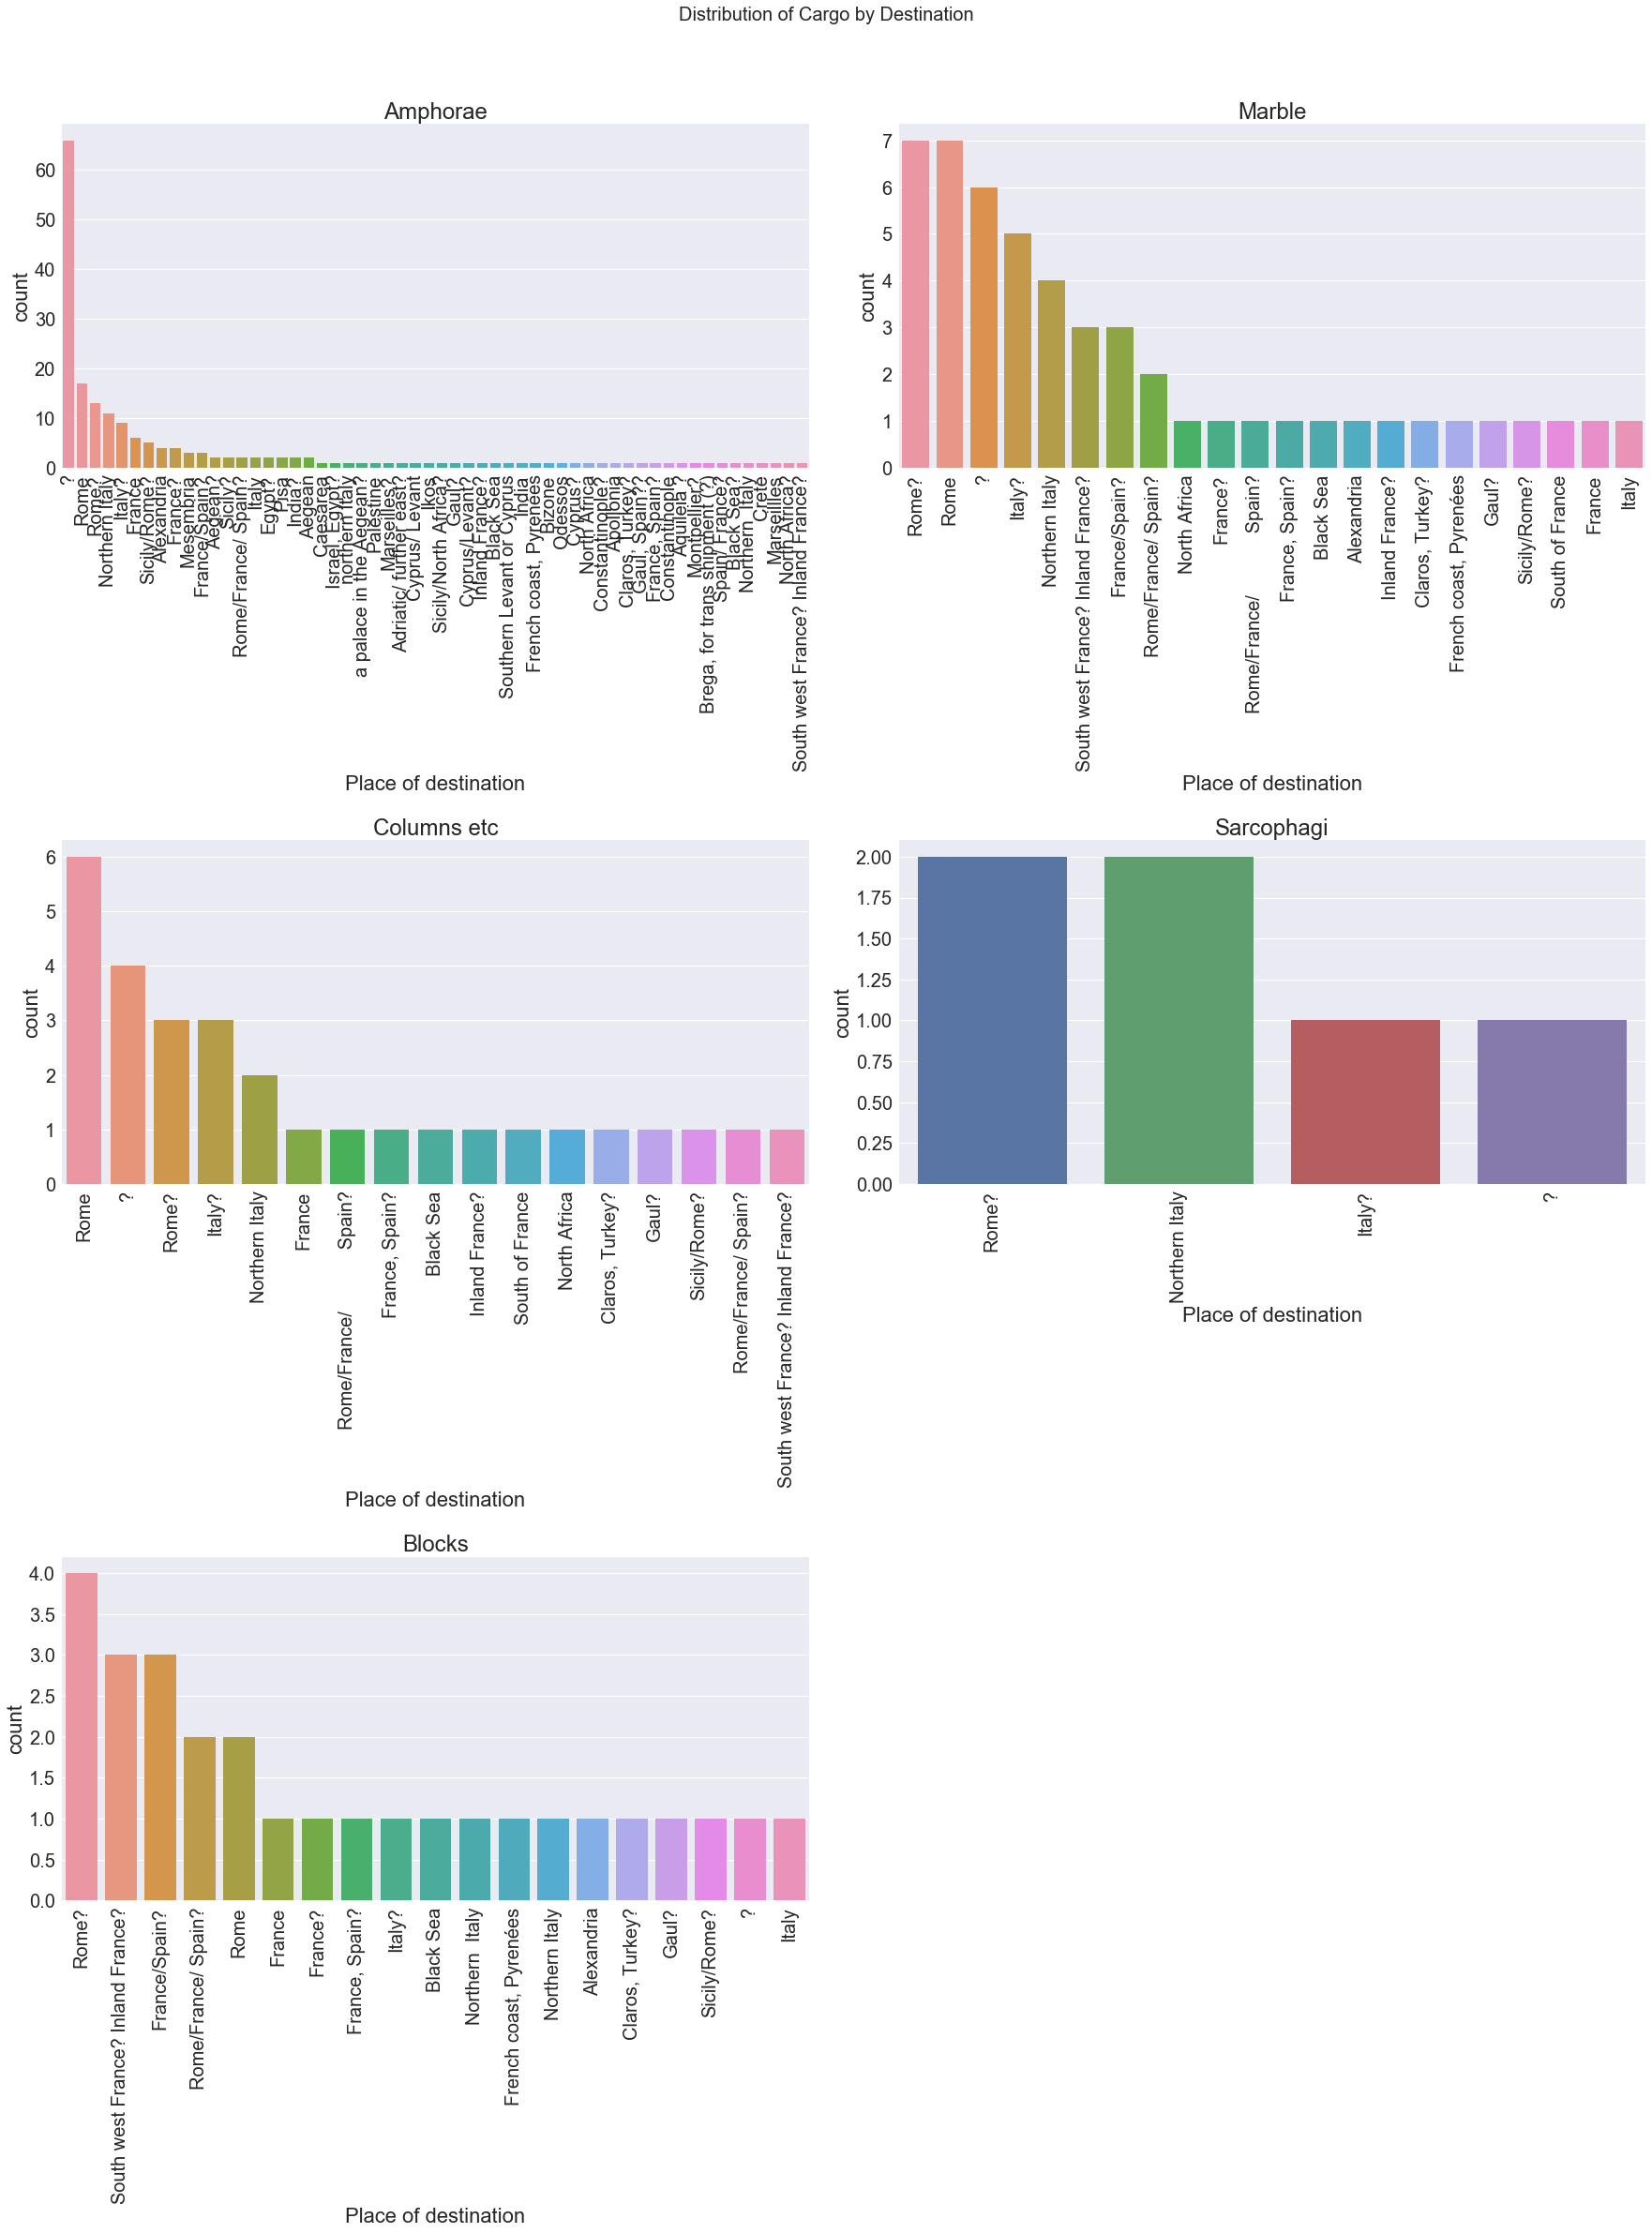

In [36]:
sns.set_palette('husl')
sns.set(font_scale=2)
fig = plt.figure(figsize = (25,35))
fig.suptitle('Distribution of Cargo by Destination', fontsize = 20)
count = 1
for i in cargo: 
    plt.subplot( 3, 2, count)
    sarc= df[df[i]== True]
    sarc=sarc.replace('', 'Unknown')
    ax =sns.countplot(x = 'Place of destination', data = sarc, order = sarc['Place of destination'].value_counts().index)
   # ax.legend_.remove()
    ax.set_title(i)
    plt.xticks(rotation = 90)


    count+=1

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


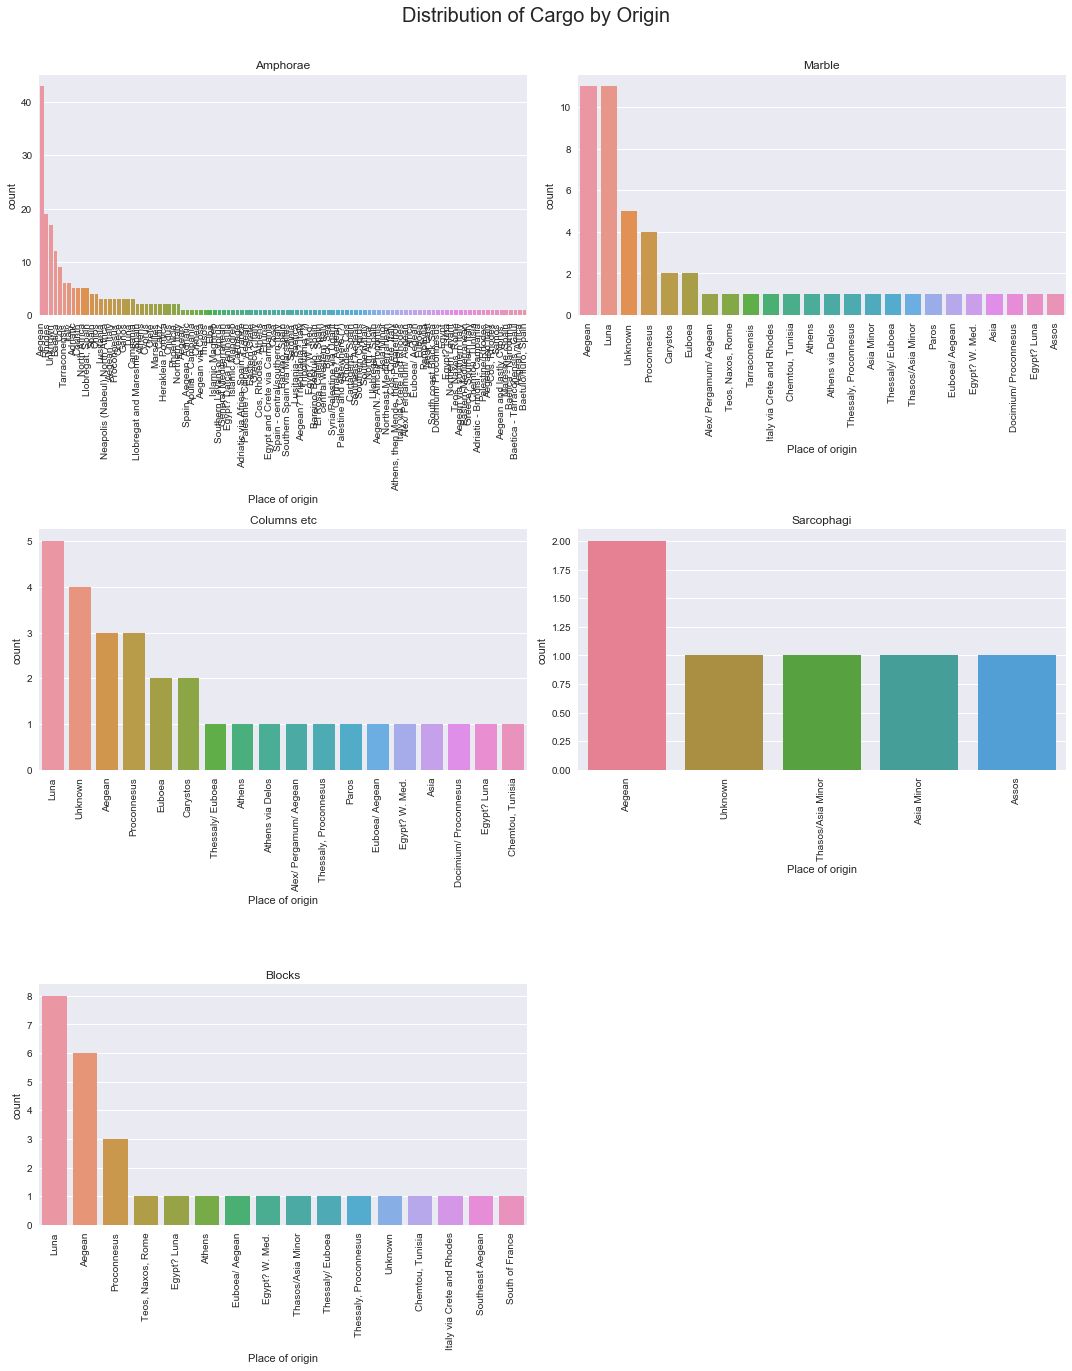

In [87]:
sns.set_palette('husl')
fig = plt.figure(figsize = (15,20))
fig.suptitle('Distribution of Cargo by Origin', fontsize = 20)
count = 1
for i in cargo: 
    plt.subplot( 3, 2, count)
    sarc= df[df[i]== True]
    sarc=sarc.replace('', 'Unknown')
    ax =sns.countplot(x = 'Place of origin', data = sarc, order = sarc['Place of origin'].value_counts().index)
   # ax.legend_.remove()
    ax.set_title(i)
    plt.xticks(rotation = 90)


    count+=1

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

(0, 513.58170176156625)

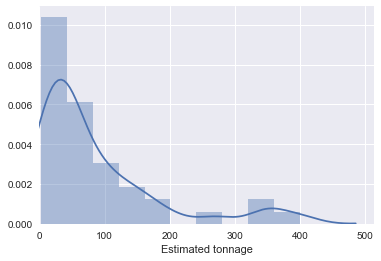

In [14]:
tonnage = df[df['Estimated tonnage'] != 0]
sns.distplot(tonnage['Estimated tonnage'].dropna())
plt.xlim([0,None])

In [81]:
df.columns

Index(['Wreck ID', 'Strauss ID', 'Name', 'Parker Number', 'Sea area',
       'Country', 'Region', 'Latitude', 'Longitude', 'Min depth', 'Max depth',
       'Depth', 'Period', 'Dating', 'Earliest date', 'Latest date',
       'Date range', 'Mid point of date range', 'Probability',
       'Place of origin', 'Place of destination', 'Reference', 'Comments',
       'Amphorae', 'Marble', 'Columns etc', 'Sarcophagi', 'Blocks',
       'Marble type', 'Other cargo', 'Hull remains', 'Shipboard paraphernalia',
       'Ship equipment', 'Estimated tonnage', 'Amphora type', 'range'],
      dtype='object')

In [92]:
df.Period.unique()

array(['Roman Imperial', 'Roman Republic', 'Roman', 'early Roman Imperial',
       'Hellenistic/Roman', 'Classical/Hellenistic', 'Hellenistic',
       'Roman Republican', 'Not known', 'early Byzantine',
       'Classical / Hellenistic', 'Hellenistic?', '?', 'Roman period',
       'Roman period?', 'Ancient', 'Roman Late Empire?', 'Roman  Imperial',
       'Ancient?', 'Ancient (?)', nan, 'Roman Rep/Imperial',
       'Roman Republic/Imperial', 'Roma Imperial', 'Roman Rep/Imp',
       'Phoenician', 'Late Roman Imperial', 'Republican', 'Saracen',
       'Greek', 'Arab', 'Roman Empire', 'Byzantine', 'Bronze Age',
       'Late Roman', 'Middle Byzantine', 'Late Antiquity',
       'Greek/Etruscan?', 'Late Antique', 'Archaic', 'Classical',
       'Norman/Arab', 'Medieval', 'Hellenstic', 'Late Republican',
       'Etruscan', 'Late Bronze Age', 'Classical Greek', 'Punic',
       'Roman Repbulic', 'Late Rep/early Imp', 'Islamic', 'Middle Ages',
       'late Rep/early Imp', 'Late Imperial', 'Rom Rep

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

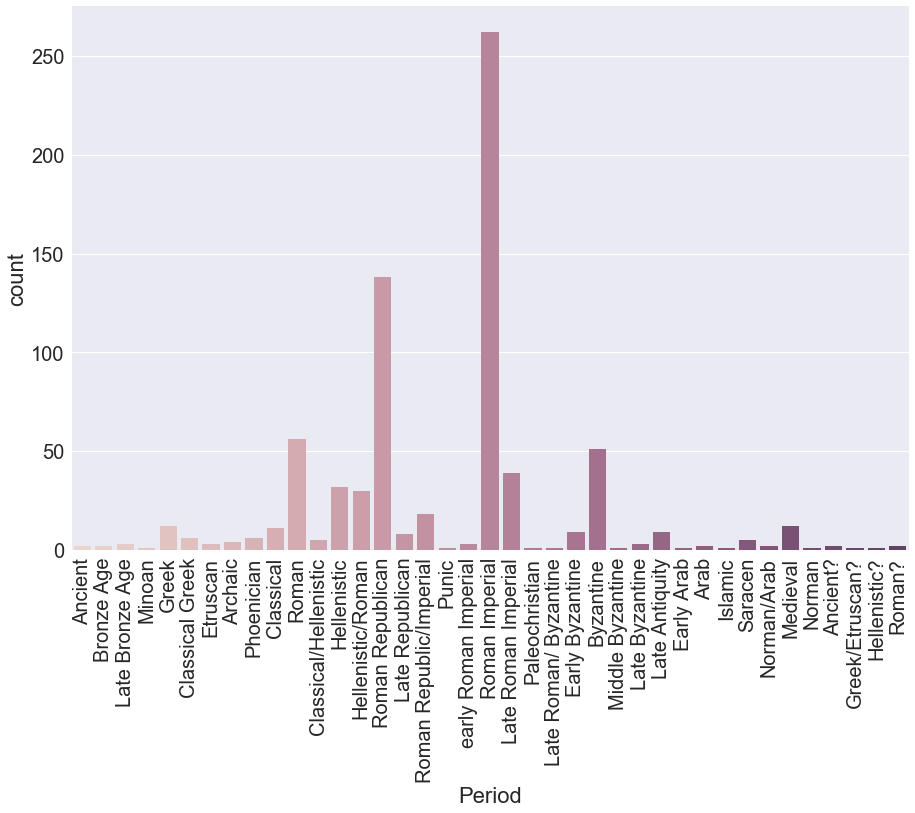

In [33]:
fig = plt.figure(figsize = (15,10))
df_crono = df[df['Period'] != 'Not known']
df_crono = df_crono.replace ('Hellenistic/ Roman', 'Hellenistic/Roman')
df_crono = df_crono.replace (['Roman Republic', 'Republican', 'Roman Repbulic'], 'Roman Republican')
df_crono = df_crono.replace ('Classical / Hellenistic', 'Classical/Hellenistic')
df_crono = df_crono.replace (['Roman period','Roman Empire'], 'Roman')
df_crono = df_crono.replace (['Roman  Imperial', 'Roma Imperial'], 'Roman Imperial')
df_crono = df_crono.replace ('Ancient (?)', 'Ancient?')
df_crono = df_crono.replace (['Roman Rep/Imperial','Roman Rep/Imp', 'Late Rep/early Imp', 'late Rep/early Imp', 'Late Rep/early Imperial', 'Rom Rep/Imperial', 'Late Republican/early Imperial', 'Late Rep/Imperial', 'Late Republic-early Imperial'], 'Roman Republic/Imperial')
df_crono = df_crono.replace (['Late  Imperial', 'Late Roman'], 'Late Roman Imperial')
df_crono = df_crono.replace ('Late Antique', 'Late Antiquity')
df_crono = df_crono.replace ('Hellenstic', 'Hellenistic')
df_crono = df_crono.replace ('Late Republic', 'Late Republican')
df_crono = df_crono.replace ('early Byzantine','Early Byzantine')
df_crono = df_crono.replace (['?', np.nan],'Not known')
df_crono = df_crono.replace ('Middle Ages','Medieval')
df_crono = df_crono.replace (['Late Roman?','Roman Late Empire?'], 'Late Roman Imperial?')
df_crono = df_crono.replace ('Roman period?','Roman?')



order = ['Ancient', 'Bronze Age', 'Late Bronze Age', 'Minoan','Greek', 'Classical Greek','Etruscan','Archaic',
         'Phoenician','Classical', 'Roman', 
         'Classical/Hellenistic', 'Hellenistic', 'Hellenistic/Roman',
         'Roman Republican', 'Late Republican','Roman Republic/Imperial', 'Punic',
         'early Roman Imperial', 'Roman Imperial', 'Late Roman Imperial', 'Paleochristian',  
         'Late Roman/ Byzantine', 'Early Byzantine','Byzantine', 'Middle Byzantine', 'Late Byzantine',
         'Late Antiquity', 'Early Arab', 'Arab','Islamic', 'Saracen','Norman/Arab', 
         'Medieval', 'Norman','Ancient?', 'Greek/Etruscan?', 'Hellenistic?', 'Roman?']
sns.countplot(x = 'Period', data = df_crono, order = order)
plt.xticks(rotation = 90)

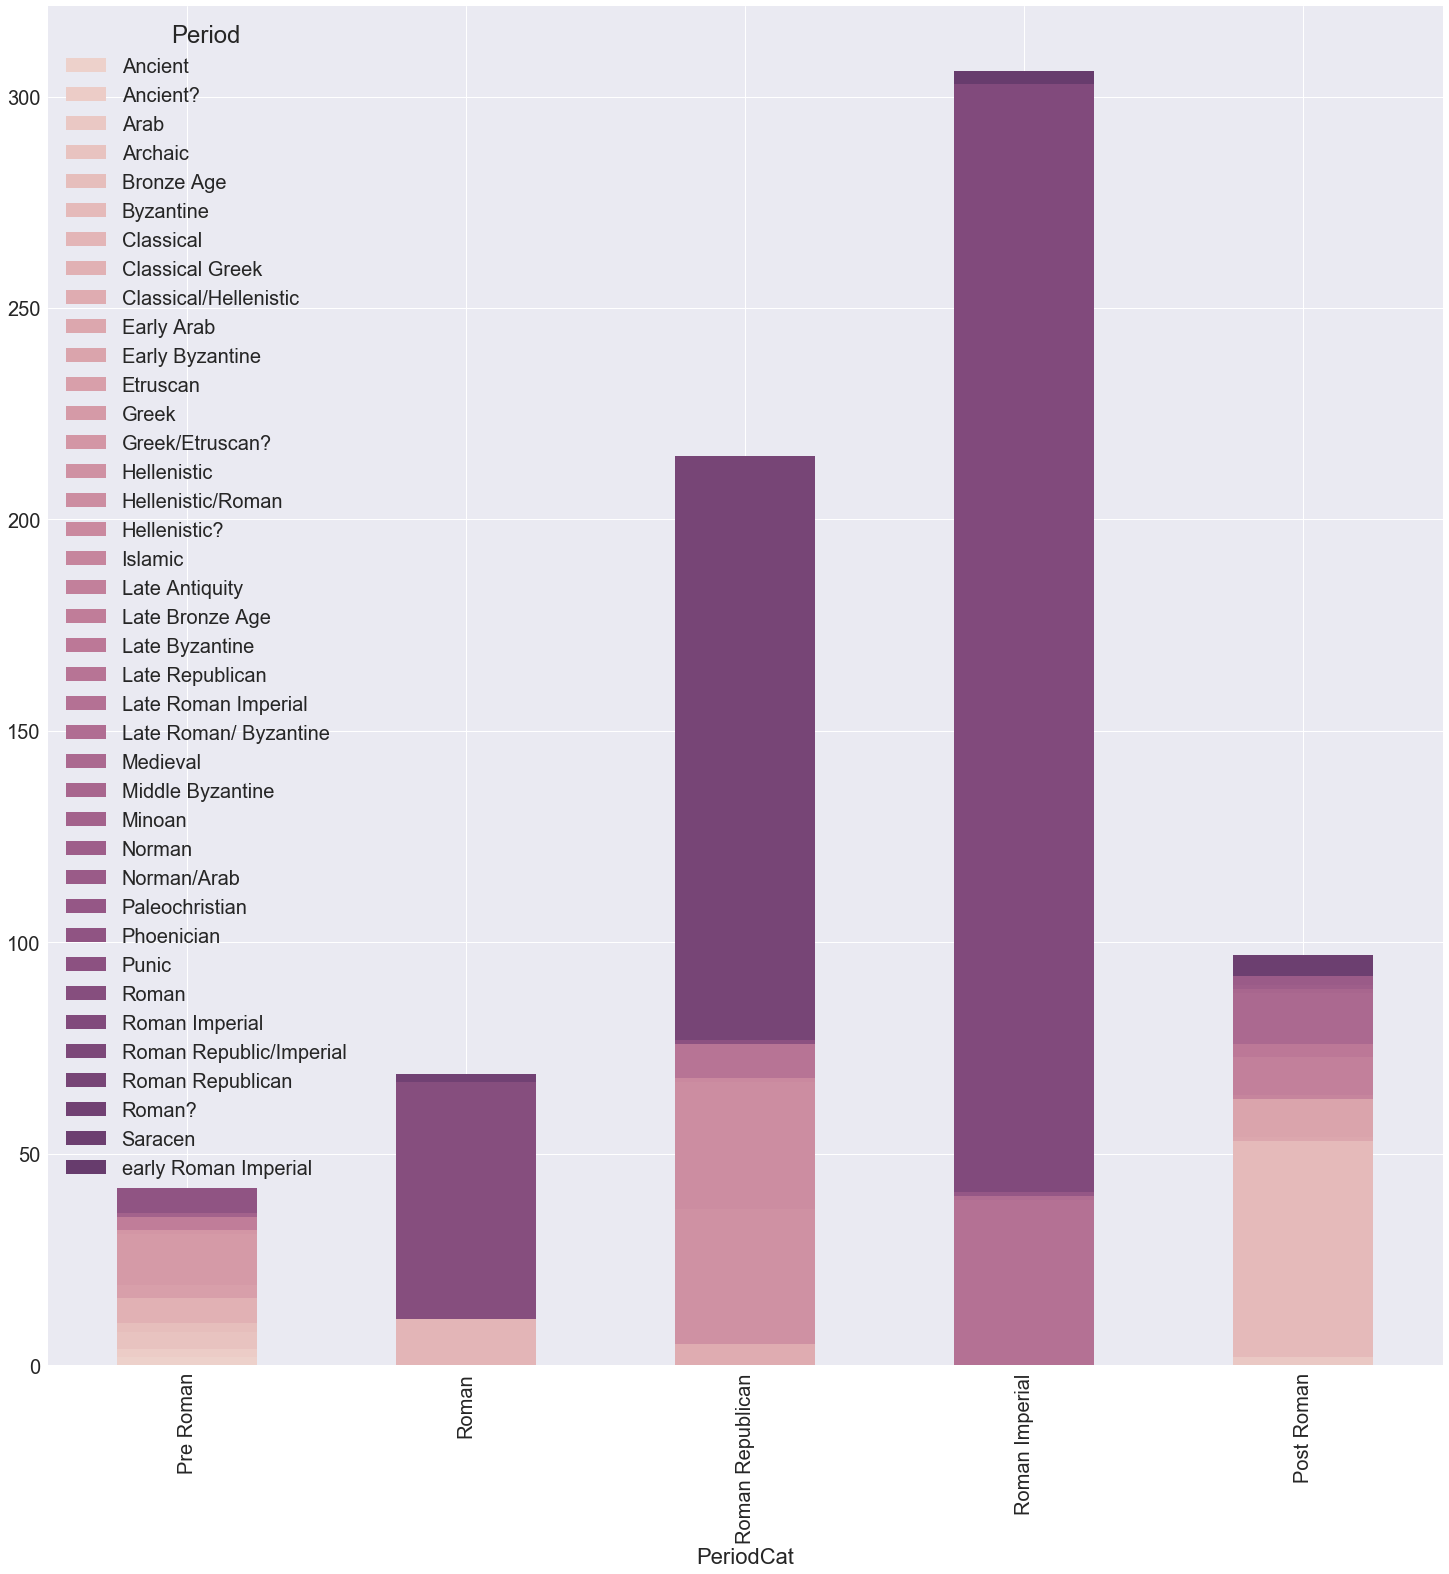

In [34]:
sns.set_palette(sns.cubehelix_palette(50))
categories = {'Ancient': 'Pre Roman', 
              'Ancient?': 'Pre Roman',
              'Bronze Age': 'Pre Roman', 
              'Late Bronze Age': 'Pre Roman', 
              'Minoan': 'Pre Roman',
              'Greek': 'Pre Roman', 
              'Classical Greek': 'Pre Roman',
              'Etruscan': 'Pre Roman',
              'Greek/Etruscan?': 'Pre Roman',
              'Archaic': 'Pre Roman',
              'Phoenician': 'Pre Roman',
              'Classical':'Roman', 
              'Roman':'Roman', 
              'Roman?': 'Roman',
              'Classical/Hellenistic':'Roman Republican', 
              'Hellenistic':'Roman Republican',
              'Hellenistic?':'Roman Republican',
              'Hellenistic/Roman':'Roman Republican',
              'Roman Republican':'Roman Republican', 
              'Late Republican':'Roman Republican',
              'Punic':'Roman Republican',
              'Roman Republic/Imperial':'Roman Republic/Imperial', 
              'early Roman Imperial':'Roman Imperial', 
              'Roman Imperial':'Roman Imperial', 
              'Late Roman Imperial':'Roman Imperial', 
              'Paleochristian':'Roman Imperial',  
              'Late Roman/ Byzantine':'Roman Imperial', 
              'Early Byzantine': 'Post Roman',
              'Byzantine': 'Post Roman', 
              'Middle Byzantine': 'Post Roman', 
              'Late Byzantine': 'Post Roman', 
              'Late Antiquity': 'Post Roman', 
              'Early Arab': 'Post Roman', 
              'Arab': 'Post Roman',
              'Islamic': 'Post Roman', 
              'Saracen': 'Post Roman',
              'Norman/Arab': 'Post Roman', 
              'Medieval': 'Post Roman', 
              'Norman': 'Post Roman'}

df_crono['PeriodCat']= df_crono.Period.map(categories)
key = ['Pre Roman', 'Roman','Roman Republican', 'Roman Imperial', 'Post Roman']

df_crono.groupby(['PeriodCat', 'Period']).size().unstack().loc[key].plot(kind='bar', 
                                                                            stacked=True, 
                                                                            figsize = (25,25))

A flow diagram per period. A flow diagram with sellos in the middle. boxplots with origins and destinations for different goods, esp amphoras. 

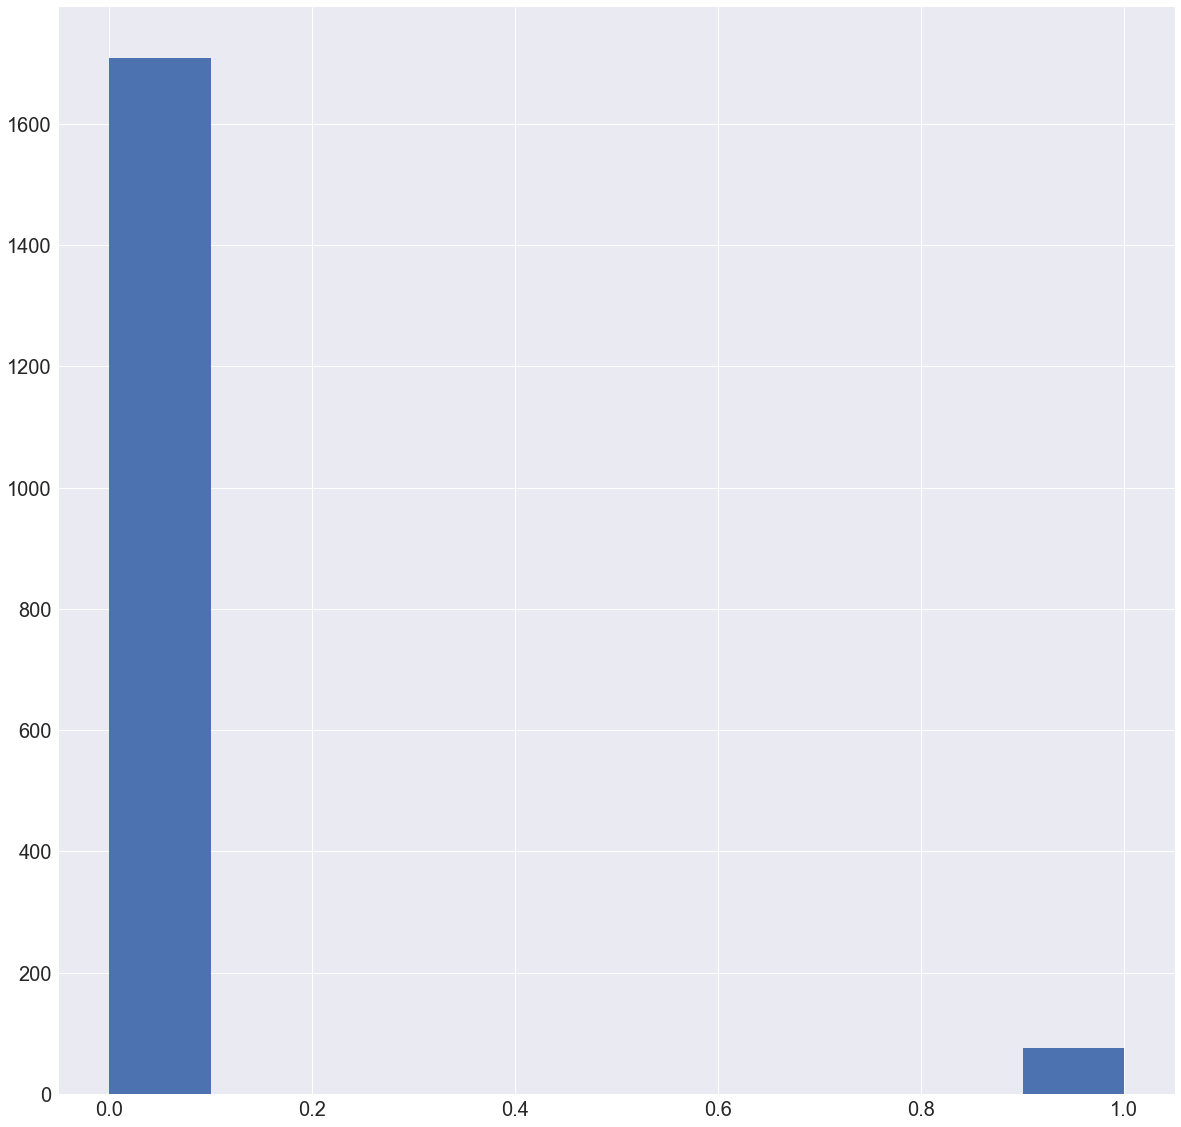

In [25]:
fig = plt.figure(figsize = (20,20))
df.Marble.hist()